# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [2]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv("./content/pima-indians-diabetes.csv", sep = ",")

## Exploración de datos

In [3]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
312,3,113,50,10,85,29.5,0.626,25,0
77,0,131,0,0,0,43.2,0.270,26,1
447,0,104,64,37,64,33.6,0.510,22,1
285,5,155,84,44,545,38.7,0.619,34,0
425,0,94,0,0,0,0.0,0.256,25,0
253,12,92,62,7,258,27.6,0.926,44,1
586,6,103,66,0,0,24.3,0.249,29,0
244,9,184,85,15,0,30.0,1.213,49,1
166,4,120,68,0,0,29.6,0.709,34,0
270,2,108,62,32,56,25.2,0.128,21,0


In [4]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [5]:
#Verificacion de datos
df_diabetes.sample(10)

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
9,4,110,92,0,0,37.6,0.191,30,0
745,1,147,94,41,0,49.3,0.358,27,1
56,0,100,88,60,110,46.8,0.962,31,0
228,0,117,80,31,53,45.2,0.089,24,0
648,0,107,60,25,0,26.4,0.133,23,0
726,0,141,84,26,0,32.4,0.433,22,0
498,6,154,74,32,193,29.3,0.839,39,0
732,2,106,56,27,165,29.0,0.426,22,0
671,10,68,106,23,49,35.5,0.285,47,0
291,2,128,78,37,182,43.3,1.224,31,1


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [6]:
#Analizamos el shape del objeto
print("Shape del dataframe: ", df_diabetes.shape)

Shape del dataframe:  (767, 9)


In [7]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [8]:
#Separamos en X e y
X = df_diabetes.drop(columns=['9. Class variable (0 or 1)'], axis=1)
y = df_diabetes['9. Class variable (0 or 1)']

In [9]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split
#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [10]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [11]:
#Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [12]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [13]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy en Train: ", train_accuracy)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy en Test: ", test_accuracy)

Accuracy en Train:  0.9850746268656716
Accuracy en Test:  0.7445887445887446


In [15]:
# Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns),
     "importance": random_forest.feature_importances_}
).sort_values("importance", ascending=False)
# Mostrar
feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


C:\Users\felip\AppData\Local\Temp\ipykernel_12260\776047078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


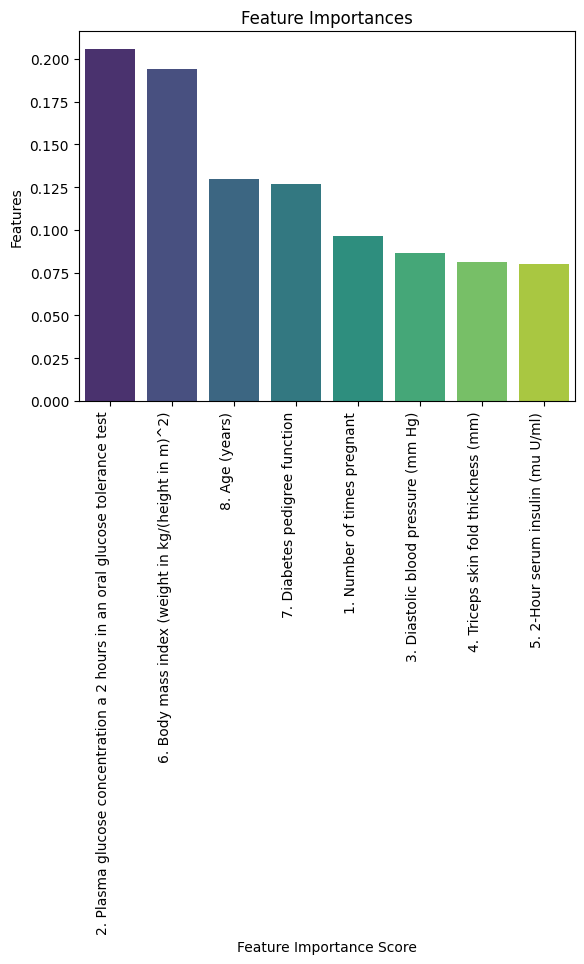

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x="feature",
    y="importance",
    data=feature_importances_df,
    palette="viridis"
)
plt.title("Feature Importances")
plt.xticks(rotation=90, horizontalalignment="right", fontsize="10", fontweight="light")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features") 
plt.show()